In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
# loading pickle file for standardization
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [3]:
#Loading ANN model 
from keras.models import load_model
import keras.metrics

# Load your model and specify the custom objects
model = load_model('temp1.h5', custom_objects={'mse': keras.metrics.mean_squared_error})


In [4]:
scaler

MinMaxScaler()

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,402 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
#Reading Validation dataset
data = pd.read_csv('Validation Dataset.csv')

In [33]:
data.head()

,SI,Date,Unnamed: 2,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp,Air Temp C
0,1,05-01-2019,NaN,8.43,8.24,8.00,7.60,1.778,48.8,9.333
1,2,05-02-2019,NaN,8.95,8.36,8.01,7.60,4.826,53.7,12.056
2,3,05-03-2019,NaN,10.19,8.95,8.22,7.65,3.810,55.6,13.111
3,4,05-04-2019,NaN,11.24,9.67,8.62,7.78,8.128,53.3,11.833
4,5,05-05-2019,NaN,12.02,10.34,9.09,7.98,0.000,52.3,11.278


##### Feature Engineering

In [34]:
data.drop(columns=['SI','Unnamed: 2','Air Temp'],axis=1,inplace=True)

In [35]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp C
0,05-01-2019,8.43,8.24,8.00,7.60,1.778,9.333
1,05-02-2019,8.95,8.36,8.01,7.60,4.826,12.056
2,05-03-2019,10.19,8.95,8.22,7.65,3.810,13.111
3,05-04-2019,11.24,9.67,8.62,7.78,8.128,11.833
4,05-05-2019,12.02,10.34,9.09,7.98,0.000,11.278


In [36]:
# Convert 'Date' to datetime 
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Create the 'day_of_year' column
data['day_of_year'] = data['Date'].dt.dayofyear


In [37]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp C,day_of_year
0,2019-05-01,8.43,8.24,8.00,7.60,1.778,9.333,121.0
1,2019-05-02,8.95,8.36,8.01,7.60,4.826,12.056,122.0
2,2019-05-03,10.19,8.95,8.22,7.65,3.810,13.111,123.0
3,2019-05-04,11.24,9.67,8.62,7.78,8.128,11.833,124.0
4,2019-05-05,12.02,10.34,9.09,7.98,0.000,11.278,125.0


In [38]:
data['Rainfall(inch)'] = data['rainfall (mm)'] * 0.0393701

In [39]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),rainfall (mm),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,1.778,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,4.826,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,3.810,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,8.128,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,0.000,11.278,125.0,0.00


In [40]:
data.drop(columns=['rainfall (mm)'],axis=1,inplace=True)

In [41]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


In [42]:
X = data[['Air Temp C','Rainfall(inch)','day_of_year']]

X.head()

,Air Temp C,Rainfall(inch),day_of_year
0,9.333,0.07,121.0
1,12.056,0.19,122.0
2,13.111,0.15,123.0
3,11.833,0.32,124.0
4,11.278,0.00,125.0


In [43]:
#Standardization

validation_data_scaled = scaler.transform(X)

In [44]:
#prediction

predicted_values = model.predict(validation_data_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
predicted_values

array([[18.700241 , 21.672953 ],
       [19.20749  , 21.692139 ],
       [19.398432 , 21.701345 ],
       ...,
       [ 1.4292933,  2.424792 ],
       [ 1.4292932,  2.4247923],
       [ 1.4292932,  2.4247923]], dtype=float32)

In [46]:
#creating dataframe for predicted values
df = pd.DataFrame(predicted_values, columns=['Temp_Pred(0.9m)','Temp_Pred(1.8m)'])

In [47]:
df.head()

,Temp_Pred(0.9m),Temp_Pred(1.8m)
0,18.700241,21.672953
1,19.207491,21.692139
2,19.398432,21.701345
3,19.406530,21.872974
4,19.221674,21.823034


In [48]:
#concate both dataframes

X = pd.concat([X, df], axis=1)

In [49]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year,Temp_Pred(0.9m),Temp_Pred(1.8m)
0,9.333,0.07,121.0,18.700241,21.672953
1,12.056,0.19,122.0,19.207491,21.692139
2,13.111,0.15,123.0,19.398432,21.701345
3,11.833,0.32,124.0,19.406530,21.872974
4,11.278,0.00,125.0,19.221674,21.823034


In [51]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'data'
# Columns in 'data': "Air Temp C", "Rainfall(inch)", "day_of_year", "Temp_Pred(0.9m)"

# Convert feet to meters
depths_ft = [1, 2, 3, 4]
depths_m = [d * 0.3048 for d in depths_ft]  # Convert ft to meters

# Define a default gradient (change in temperature per meter of depth)
default_gradient = -0.5  # Example: Temperature decreases by 0.5°C per meter (adjust based on domain knowledge)

# Predict temperatures at 1ft, 2ft, 3ft, and 4ft using only "Temp_Pred(0.9m)"
# Temp_Pred(depth_m) = Temp_Pred(0.9m) + gradient * (depth_m - 0.9)
for depth, depth_m in zip(depths_ft, depths_m):
    X[f"Temp_Pred({depth}ft)"] = X["Temp_Pred(0.9m)"] + default_gradient * (depth_m - 0.9)

# Display the updated DataFrame
# print(X)


In [52]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


In [53]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


In [58]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'data'
# Columns in 'data': "Air Temp C", "Rainfall(inch)", "day_of_year", "Temp_Pred(0.9m)"

# Convert feet to meters
depths_ft = [1, 2, 3, 4]
depths_m = [d * 0.3048 for d in depths_ft]  # Convert ft to meters

# Define a default gradient (change in temperature per meter of depth)
default_gradient = -0.5  # Example: Temperature decreases by 0.5°C per meter (adjust based on domain knowledge)

# Predict temperatures at 1ft, 2ft, 3ft, and 4ft using only "Temp_Pred(0.9m)"
# Temp_Pred(depth_m) = Temp_Pred(0.9m) + gradient * (depth_m - 0.9)
for depth, depth_m in zip(depths_ft, depths_m):
    X[f"Temp_Pred({depth}ft)"] = X["Temp_Pred(0.9m)"] + default_gradient * (depth_m - 0.9)

# Display the updated DataFrame
# print(X)


In [59]:
X.head()

,Air Temp C,Rainfall(inch),day_of_year,Temp_Pred(0.9m),Temp_Pred(1.8m),Temp_Pred(1ft),Temp_Pred(2ft),Temp_Pred(3ft),Temp_Pred(4ft)
0,9.333,0.07,121.0,18.700241,21.672953,18.997841,18.845442,18.693041,18.540642
1,12.056,0.19,122.0,19.207491,21.692139,19.505091,19.352692,19.200291,19.047892
2,13.111,0.15,123.0,19.398432,21.701345,19.696032,19.543633,19.391232,19.238832
3,11.833,0.32,124.0,19.406530,21.872974,19.704130,19.551731,19.399330,19.246931
4,11.278,0.00,125.0,19.221674,21.823034,19.519274,19.366875,19.214474,19.062075


In [60]:
data.head()

,Date,Temperature_1ft (0.3m),Temperature2ft (0.6m),Temperature3ft (0.91m),Temperature4ft (1.21m),Air Temp C,day_of_year,Rainfall(inch)
0,2019-05-01,8.43,8.24,8.00,7.60,9.333,121.0,0.07
1,2019-05-02,8.95,8.36,8.01,7.60,12.056,122.0,0.19
2,2019-05-03,10.19,8.95,8.22,7.65,13.111,123.0,0.15
3,2019-05-04,11.24,9.67,8.62,7.78,11.833,124.0,0.32
4,2019-05-05,12.02,10.34,9.09,7.98,11.278,125.0,0.00


In [ ]:
Temp_Pred(0.9m)  Temperature3ft (0.91m)

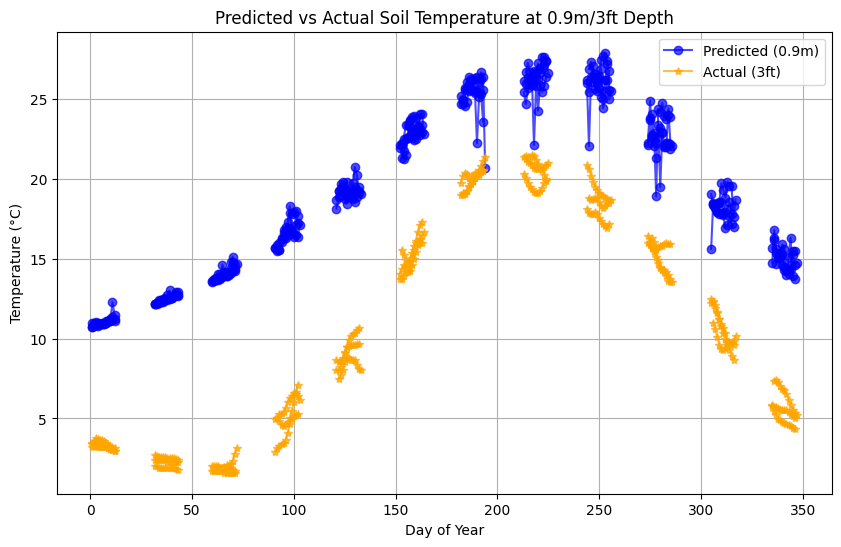

In [67]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(10, 6))
# plt.plot(X["day_of_year"], X["Temp_Pred(0.9m)"], label="Predicted (0.9m)")
# plt.plot(data["day_of_year"], data["Temperature3ft (0.91m)"], label="Actual (3ft)")
plt.plot(X["day_of_year"], X["Temp_Pred(0.9m)"], label="Predicted (0.9m)", color='blue', alpha=0.7,marker='o')
plt.plot(data["day_of_year"], data["Temperature3ft (0.91m)"], label="Actual (3ft)", color='orange', alpha=0.7,marker='*')
plt.title("Predicted vs Actual Soil Temperature at 0.9m/3ft Depth")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

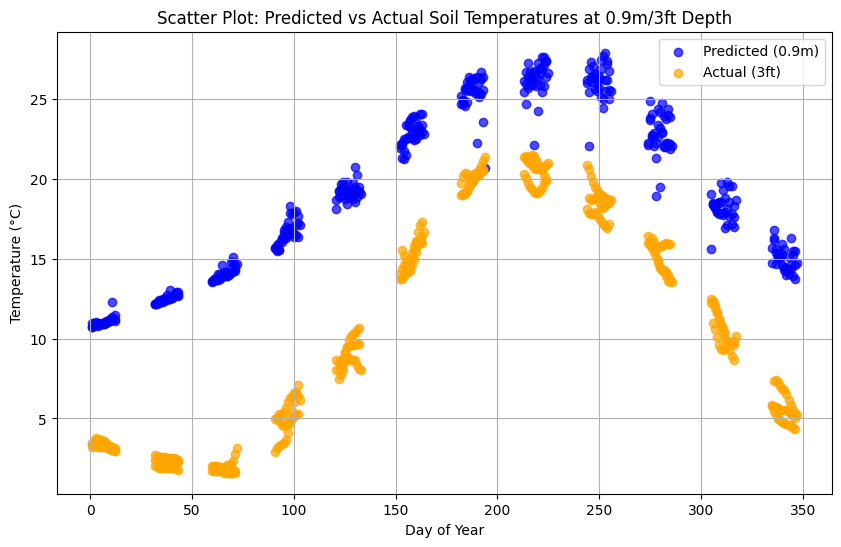

In [64]:
import matplotlib.pyplot as plt

# Creating a scatter plot for comparison
plt.figure(figsize=(10, 6))

# Scatter plot for Predicted and Actual data
plt.scatter(X["day_of_year"], X["Temp_Pred(0.9m)"], label="Predicted (0.9m)", color='blue', alpha=0.7)
plt.scatter(data["day_of_year"], data["Temperature3ft (0.91m)"], label="Actual (3ft)", color='orange', alpha=0.7)

# Adding titles and labels
plt.title("Scatter Plot: Predicted vs Actual Soil Temperatures at 0.9m/3ft Depth")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()

plt.show()


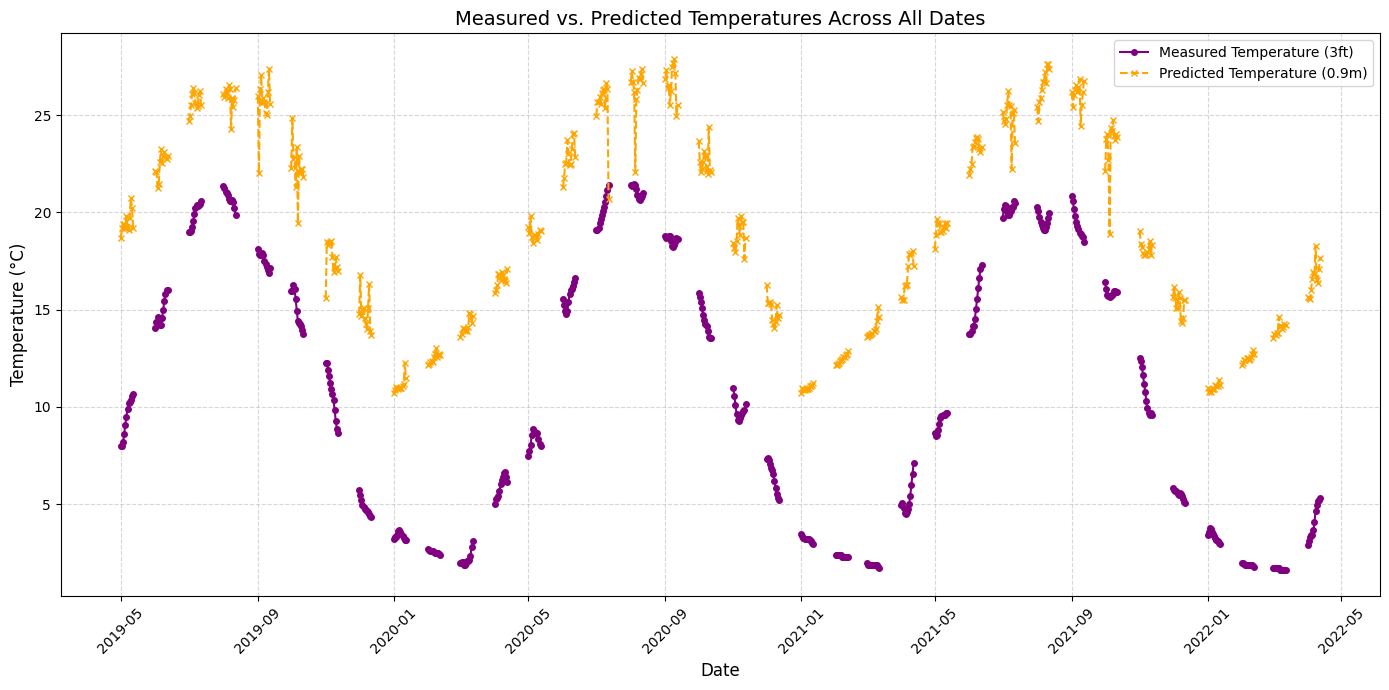

In [68]:
# Extracting necessary columns as numpy arrays
y_test = np.array(data[["Temperature3ft (0.91m)"]])
y_pred = np.array(X[["Temp_Pred(0.9m)"]])

# Plot for Measured vs. Predicted Temperatures at 0.9m for all years
plt.figure(figsize=(14, 7))

# Plotting Measured Temperatures for 3ft
plt.plot(data['Date'], y_test[:, 0], label='Measured Temperature (3ft)', color='purple', linestyle='-', marker='o', markersize=4)

# Plotting Predicted Temperatures for 0.9m
plt.plot(data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='x', markersize=4)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()